<a href="https://colab.research.google.com/github/apexro45/FITBIT-ANALYSIS/blob/main/MASTER_DATA_TO_FINAL_FIT_BIT_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("MASTER_DATA.csv")

In [ ]:
df.head()

,Id,ActivityHour,Name,TotalIntensity,AverageIntensity,StepTotal,Calories,TrackerDistance,TotalDistance,TotalSteps,TrackerDistance.1,WeightKg,WeightPounds,Fat,BMI
0,1503960366,04-12-2016 00:00,Aarav,20,0.333333,373,81,8.50,8.50,13162.0,8.50,52.599998,115.963146,22.0,22.65
1,1503960366,04-12-2016 01:00,Aarav,8,0.133333,160,61,6.97,6.97,10735.0,6.97,52.599998,115.963146,NaN,22.65
2,1503960366,04-12-2016 02:00,Aarav,7,0.116667,151,59,6.74,6.74,10460.0,6.74,52.599998,115.963146,22.0,22.65
3,1503960366,04-12-2016 03:00,Aarav,0,0.000000,0,47,6.28,6.28,9762.0,6.28,52.599998,115.963146,NaN,22.65
4,1503960366,04-12-2016 04:00,Aarav,0,0.000000,0,48,8.16,8.16,12669.0,8.16,52.599998,115.963146,22.0,22.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 22099 non-null  int64  
 1   ActivityHour       22099 non-null  object 
 2   Name               22099 non-null  object 
 3   TotalIntensity     22099 non-null  int64  
 4   AverageIntensity   22099 non-null  float64
 5   StepTotal          22099 non-null  int64  
 6   Calories           22099 non-null  int64  
 7   TrackerDistance    940 non-null    float64
 8   TotalDistance      940 non-null    float64
 9   TotalSteps         940 non-null    float64
 10  TrackerDistance.1  940 non-null    float64
 11  WeightKg           1088 non-null   float64
 12  WeightPounds       1088 non-null   float64
 13  Fat                51 non-null     float64
 14  BMI                1088 non-null   float64
dtypes: float64(9), int64(4), object(2)
memory usage: 2.5+ MB


In [ ]:
null_values = df.isnull().sum()
print(null_values)

Id                       0
ActivityHour             0
Name                     0
TotalIntensity           0
AverageIntensity         0
StepTotal                0
Calories                 0
TrackerDistance      21159
TotalDistance        21159
TotalSteps           21159
TrackerDistance.1    21159
WeightKg             21011
WeightPounds         21011
Fat                  22048
BMI                  21011
dtype: int64


In [ ]:
import random

# Define a function to fill missing values with randomly shuffled values for each column
def fill_missing_random_shuffled(df):
    for column in df.columns:
        # Check if the column has missing values
        if df[column].isnull().sum() > 0:
            # Shuffle the existing values in the column
            choices = df[column].dropna().unique().tolist()
            random.shuffle(choices)
            # Generate random values for missing values
            random_values = [random.choice(choices) for _ in range(df[column].isnull().sum())]
            # Fill missing values with randomly shuffled values
            df.loc[df[column].isnull(), column] = random_values
    return df

# Fill missing values with randomly shuffled values for each column
df_filled_random_shuffled = fill_missing_random_shuffled(df)




In [ ]:
null_values = df.isnull().sum()
print(null_values)

Id                   0
ActivityHour         0
Name                 0
TotalIntensity       0
AverageIntensity     0
StepTotal            0
Calories             0
TrackerDistance      0
TotalDistance        0
TotalSteps           0
TrackerDistance.1    0
WeightKg             0
WeightPounds         0
Fat                  0
BMI                  0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

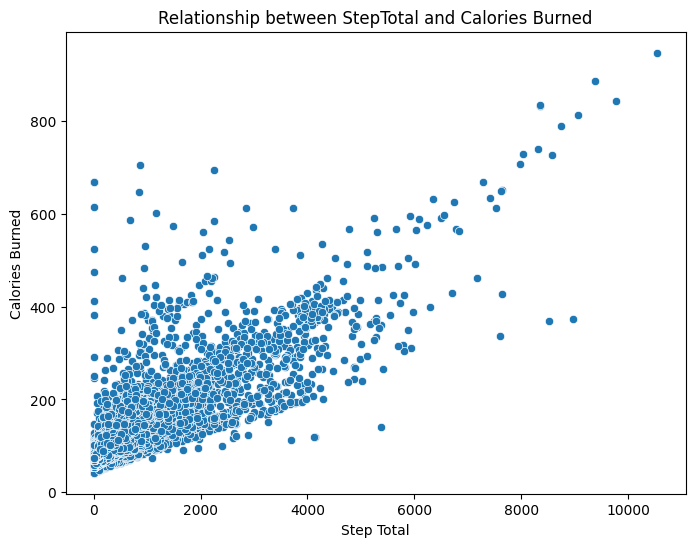

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='StepTotal', y='Calories')
plt.title('Relationship between StepTotal and Calories Burned')
plt.xlabel('Step Total')
plt.ylabel('Calories Burned')
plt.show()

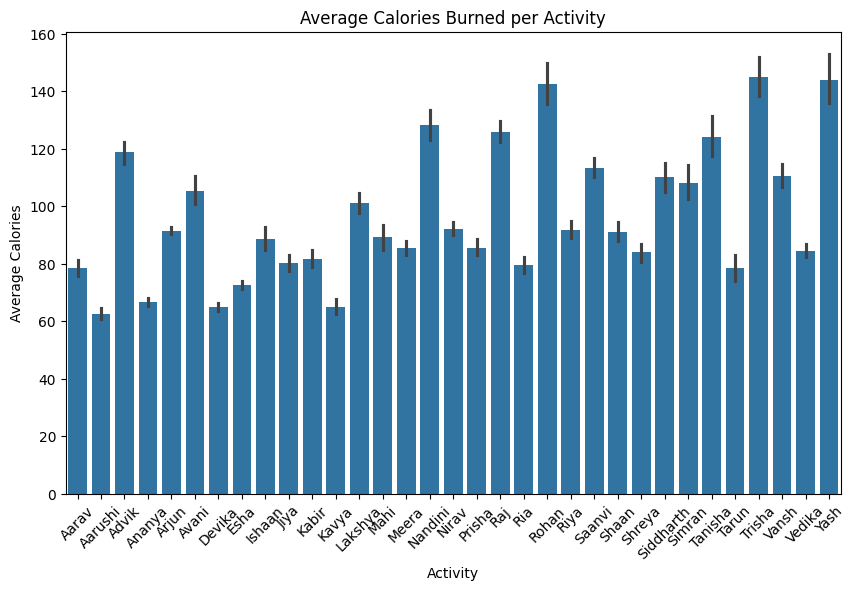

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Name', y='Calories')
plt.title('Average Calories Burned per Activity')
plt.xlabel('Activity')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)
plt.show()

In [ ]:

df.to_csv('fitness_data.csv', index=False)